# Gradeint Descent Implementation

we shall be considering functions of the type y = mx + c

In [3]:
from dind import np , plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

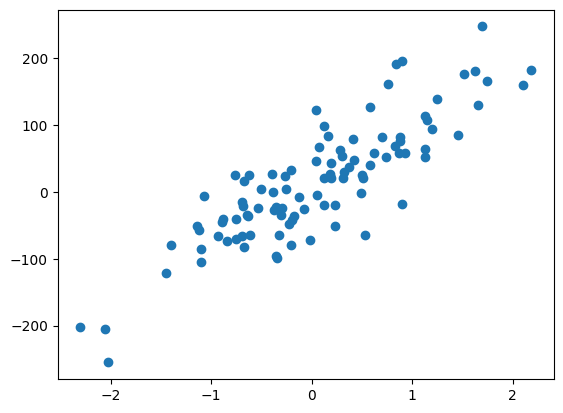

In [4]:
X,y = make_regression(n_samples=100 , n_features=1 , n_informative=1 , n_targets=1 , noise=50 , random_state=1)
plt.scatter(X,y)

Step 1: Find the parameters using sklearn's LinearRegression Model

In [5]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [7]:
print(model.coef_ , model.intercept_)

[85.14546889] 10.135071944054275


Step 2: Implementing Gradient Descent

* Creating a GD Class

In [41]:
class GD():

    def __init__(self , epochs , learning_rate , slope=20 , intercept=100):
        self.epochs = epochs
        self.lr = learning_rate
        self.m = slope
        self.b = intercept
    
    def fit(self,X,y):
        for epoch in range(self.epochs):
            loss_slope_m = np.sum((self.m*X.ravel() + self.b - y)*X.ravel())
            loss_slope_b = np.sum(self.m*X.ravel() + self.b - y)

            step_size_m = self.lr * loss_slope_m
            step_size_b = self.lr * loss_slope_b

            self.m -= step_size_m
            self.b -= step_size_b
        print(self.m , self.b)

    def predict(self ,X):
        return(self.m*X.ravel() + self.b)

    

In [45]:
gdm = GD(1000 , 0.01 , 50 , 9)
gdm.fit(X,y)

85.1454688891905 10.135071944054275


In [46]:
ypreds = gdm.predict(X) 
print(y)

[-6.47837150e+01  3.53525698e+00 -2.24930988e+00  1.60486845e+02
  1.76846086e+02  3.75120284e+01  2.04399290e+01  1.65475124e+01
 -8.00299319e+01  2.12950877e+01 -3.68533417e+01  2.71863822e+01
 -1.05041229e+02 -1.80445868e+01 -8.50723156e+01  6.89340357e+01
 -2.50673768e+01 -9.59581539e+01 -8.21563475e+01 -6.22450275e+00
 -3.50170055e+01  1.82489231e+02  5.79386310e+01  4.26634726e+01
  1.30913351e-01 -2.09715557e+01 -4.01151102e+00  4.08451522e+01
  1.38282568e+02 -7.02177235e+01 -2.25347306e+01 -4.47436142e+01
  2.42126703e+01  8.16001763e+01  1.91435758e+02  4.32788040e+00
 -9.92775395e+01  2.47194634e+02 -2.02799798e+02  5.85334904e+01
  1.59536038e+02  8.54897401e+01 -7.37592095e+01 -4.06447270e+01
 -6.49055955e+01  7.59577622e+01  8.30410079e+01  6.41532713e+01
 -2.65508208e+01  2.47503948e+01 -7.89972479e+01  2.13397064e+01
  1.27320816e+02  2.91983014e+01 -1.49819398e+01  8.25052252e+01
  9.36791817e+01  3.32075339e+01 -6.39364756e+01  5.14020686e+01
  7.92951311e+01 -1.96514

In [47]:
ypreds

array([ -41.95321474,  -11.0976856 ,   51.73017859,   75.01687119,
        139.5405874 ,   42.28291757,   53.80872201,  -47.01849461,
       -108.77026334,   37.00995752,  -44.10222106,  -23.64669313,
        -83.57766397,   86.83887415,  -83.51568574,   80.63336112,
          3.700483  ,  -19.8574064 ,  -46.96878289,  -81.22334449,
        -15.93681229,  196.22691473,   83.82061032,   27.01939459,
        -22.56541616,  -48.08125722,   14.46112205,   59.75914659,
        116.81111848,  -54.09849447,  -19.60987796,  -65.4425124 ,
         26.01992906,   84.73688556,   81.57070811,  -32.8179105 ,
        -19.14251049,  154.23991252, -185.83051957,   89.41419524,
        188.96228033,  134.62693781,  -61.83035871,  -64.61059467,
        -17.31729207,   85.50083141,   23.76150326,  106.48818675,
        -21.8187411 ,   52.92018804,   -7.6513255 ,   20.36606229,
         60.08337862,   37.29980537,  -48.75670707,   69.56933678,
        112.21749699,   -6.95856797,   55.29243684,   73.31676

In [48]:
from sklearn.metrics import r2_score
score = r2_score(y , ypreds)
print(score)

0.7321024057172181
